# Cifar10 - exercicio de classificar 3 classes

Fazer classificação de 3 classes usando rede neural convolucional.
Não utilizar o pacote sklearn. Apenas o Keras e o NumPy.

Não utilizar a função de acompanhamento de gráficos durante o treinamento.

Gerar uma figura mosaic que contenha as 5 imagens de classificação correta de menor probabilidade de predição.

Gerar esta figura com o nome: cifar_fig.png

## Importação de bibliotecas

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Carregamento do dataset

In [2]:
data = np.load('/etc/jupyterhub/ia368z_2s2017/datasets/cifar10-redux.npz')

In [3]:
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 3, 32, 32), (2000,), (500, 3, 32, 32), (500,))

In [5]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('int64'))

In [6]:
num_classes = 3
y_train = keras.utils.to_categorical(y_train-3, num_classes)
y_test_categorical = y_test-3
y_test = keras.utils.to_categorical(y_test-3, num_classes)

In [7]:
def SmallCNN(nclasses,input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_shape,data_format="channels_first"))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(150))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    return model

def SmallCNN2(nclasses,input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3),padding = 'same'))
    model.add(Activation('relu'))

    model.add(Conv2D(128,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Aqui os features deixam de ser imagens
    model.add(Flatten())
    model.add(Dense(150))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))

In [8]:
# Main cell
model = SmallCNN(3,(3, 32, 32))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = keras.optimizers.Adam(lr=0.0001)
# initiate the Early Stop callback
callbacks = []
callbacks.append(EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

# Split the X_train to validation
X_val = X_train[1500:]
y_val = y_train[1500:]
X_train = X_train[0:1499]
y_train = y_train[0:1499]

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,data_format="channels_first")  # randomly flip images

datagen.fit(X_train)


In [9]:
#model.fit(X_train, y_train,batch_size=32,epochs=100,validation_data=(X_val, y_val),shuffle=True,callbacks=callbacks)
model.fit_generator(datagen.flow(X_train, y_train,batch_size=250),
                    steps_per_epoch=X_train.shape[0] // 32,
                    epochs=100,
                    validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/100
46/46 [==============================] - 61s - loss: 1.0824 - acc: 0.3959 - val_loss: 1.0605 - val_acc: 0.4840
Epoch 2/100
46/46 [==============================] - 60s - loss: 1.0142 - acc: 0.5017 - val_loss: 0.9986 - val_acc: 0.5040
Epoch 3/100
46/46 [==============================] - 59s - loss: 0.9630 - acc: 0.5289 - val_loss: 0.9619 - val_acc: 0.5300
Epoch 4/100
46/46 [==============================] - 58s - loss: 0.9289 - acc: 0.5544 - val_loss: 0.9440 - val_acc: 0.5300
Epoch 5/100
46/46 [==============================] - 60s - loss: 0.9078 - acc: 0.5717 - val_loss: 0.9264 - val_acc: 0.5460
Epoch 6/100
46/46 [==============================] - 59s - loss: 0.8867 - acc: 0.5715 - val_loss: 0.9178 - val_acc: 0.5380
Epoch 7/100
46/46 [==============================] - 60s - loss: 0.8711 - acc: 0.5853 - val_loss: 0.9084 - val_acc: 0.5600
Epoch 8/100
46/46 [==============================] - 57s - loss: 0.8597 - acc: 0.5950 - val_loss: 0.9111 - val_acc: 0.5500


In [177]:
# Run the model in X_test
evaluation = model.evaluate(X_test,y_test)
print(evaluation[1])

500/500 [==============================] - 0s     
0.526000000477


In [178]:
# Check for the correct classifications and with less prediction probability
prediction = model.predict(X_test)
prediction_proba = model.predict_proba(X_test)

480/500 [===========================>..] - ETA: 0s

In [179]:
#correct_0 = np.logical_and((prediction[:,0]==1),(y_test[:,0]==1))
#correct_1 = np.logical_and((prediction[:,1]==1),(y_test[:,1]==1))
#correct_2 = np.logical_and((prediction[:,2]==1),(y_test[:,2]==1))

In [180]:
prediction_class_index = []
prediction_correct = (np.argmax(prediction,axis=1)==y_test_categorical)
for i in range(len(prediction_correct)):
    if prediction_correct[i]:
        prediction_class_index.append((prediction_proba[i].max(),i))


In [181]:
dtype=np.dtype([('prob',float),('index',int)])
less_prob_predictions = np.sort(np.array(prediction_class_index,dtype=dtype),order="prob")[0:5]

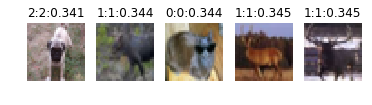

In [182]:
for i in range(5):
    idx = less_prob_predictions[i][1]
    prob = less_prob_predictions[i][0]
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].transpose((1,2,0)))
    plt.title('{}:{}:{:0.3f}'.format(y_test_categorical[idx],np.argmax(prediction,axis=1)[idx],prob))
    plt.axis('off')
plt.savefig('cifar_fig.png')